# Tutorial on resizing the digital image.

## Materials
* Original image (`/img-proc/sample-image/dog.jpg`)

In [1]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt
print('Using OpenCV version: ' + cv.__version__)

%matplotlib inline  

Using OpenCV version: 4.0.0


(600, 800, 3)
Image height: 600
Image width: 800
Image channel: 3


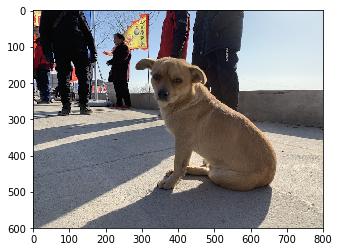

In [2]:
cv_img = cv.imread('../sample-images/dog.jpg')

# Show the image 
plt.imshow(cv_img[:, :, ::-1])   # The `[:, :, ::-1]` is included to swap between BGR and RGB channel. 

img_shape = cv_img.shape    # Get the image shape
# Check the image size 
print(img_shape)
print('Image height: ' + str(cv_img.shape[0]))
print('Image width: ' + str(cv_img.shape[1]))
print('Image channel: ' + str(cv_img.shape[2]))


As you can see that the size (or shape) of the image stored in the variable `img_shape` is a list containing the number of row, column, and channel. Let reduce the size by 1/2. 

In [3]:
img_shape_width = img_shape_col = img_shape[1]
img_shape_height = img_shape_row = img_shape[0]

img_shape_width_half = img_shape_width / 2
img_shape_height_half = img_shape_height / 2

img_shape_half = [img_shape_height_half, img_shape_width_half]
print('New size: ' + str(img_shape_half))

New size: [300.0, 400.0]


The new size is calculated. We need to convert it to integer type because the pixel value should be integers. This is why, in the cell below, we need to convert the variable type to int using `int()`. 

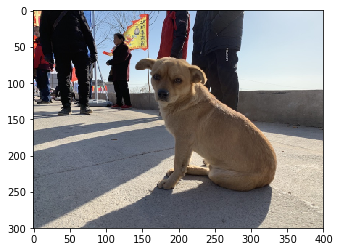

In [4]:
cv_img_half = cv.resize(cv_img, (int(img_shape_half[1]), int(img_shape_half[0])), cv.INTER_NEAREST)
cv_img_half_RGB = cv_img_half[:, :, ::-1]   # Convert OpenCV Image from BRG to RGB in Python
plt.imshow(cv_img_half_RGB)

In the image shown above, we can see that the width scale ends at 400px and the height ends at 300px. This is the result of image resizing that we have been expecting.

### Try to scale to 40 x 30 px
Next, we will try to scale the original image to a very tiny image (40-by-30 pixels). We will really see the effect of the scale this time. 

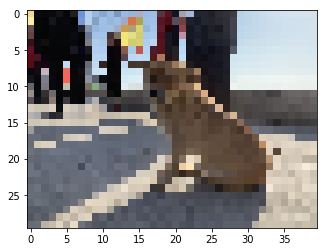

In [5]:
cv_img_tiny = cv.resize(cv_img, (40, 30), cv.INTER_NEAREST)
plt.imshow(cv_img_tiny[:, :, ::-1])

And that is our tiny image! 

## Bonus, resize smaller to larger image with bicubic interpolation 
We can also resize the image from smaller to larger image. However, there are some missing pixels. Obtaining those pixels can be done in different ways. In this example, we will use [bicubic interpolation method](https://en.wikipedia.org/wiki/Bicubic_interpolation) to _interpolate_ for those missing pixels. 

The result image will be blurry, but it is worth interpolating because it will look much nicer than our 40-by-30 pixel image! 

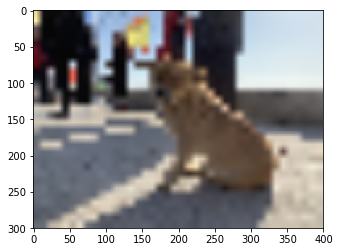

In [6]:
cv_img_up_sample = cv.resize(cv_img_tiny, (400, 300), cv.INTER_CUBIC)
plt.imshow(cv_img_up_sample[:, :, ::-1])